# 문자를 읽을 수 있는 딥러닝

|평가문항|상세기준|
|---|---|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

# 중요사항
* OCR 모델 3가지 비교하기
 * Google OCR
 * Keras OCR
 * Tesseract

# 서비스 계획 설정(목적)
현수막 또는 전광판 글씨 인식
* 선정 이유
 * 사람들이 많이 다니는 큰 차도(회전 교차로) 및 방문객들이 많이 다니는 랜드마크에 있는 실외광고용 전광판 글자를 인식 
 * 매일 혹은 매주 단위로 정보를 모아서 시, 도 단위에서 진행하는 행사 및 중요정보를 제공.
 * 담당자 관리용으로 사용 가능

# 라이브러리 및 패키지

In [1]:
import os

import matplotlib.pyplot as plt
import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR

## Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/groovy-smithy-326709-39264c0df6d5.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path_one = os.getenv('HOME')+'/aiffel/ocr_python/corona.png'
path_two = os.getenv('HOME')+'/aiffel/ocr_python/Library.png'
path_three = os.getenv('HOME')+'/aiffel/ocr_python/cass.png'

total 2952
drwxr-xr-x 2 root root    4096 Sep 21 10:58 cass
-rw-r--r-- 1 root root  100179 Sep 21 10:02 cass.png
drwxr-xr-x 2 root root    4096 Sep 21 10:58 corona
-rw-r--r-- 1 root root  370827 Sep 21 10:02 corona.png
drwxr-xr-x 3 root root    4096 Sep 21 11:24 cox
-rw-r--r-- 1 root root 2231991 Sep 21 11:25 E18_ocr_service.ipynb
-rw-r--r-- 1 root root    2331 Sep 21 10:02 groovy-smithy-326709-39264c0df6d5.json
drwxr-xr-x 2 root root    4096 Sep 21 10:58 Library
-rw-r--r-- 1 root root  294185 Sep 21 10:02 Library.png


In [4]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path_one)

Texts:

"현수막 500*90(cm) 4종
돈보다
생명을
오
코로나19
OUT!
코로나19를 이기는 가장좋은 백신은
서로에게 보내는 격려와 응원입니다.
민주노
수 전국보건의로산업노동조합
Korean ealh and edical Workers' Lnion
돈보다는
생명을
코로나19
OUT!
'보건의료노동자와 국민이 한마음 한뜻으로
코로나19를 극복합시다
인주노
전국보건의료산업노동조합
돈보다는
"생명을
코로나19
OUT!
국민건강지킴이, 보건의료노동자!
당신이 있어 든든합니다
인주노
수 전국보건의료산업노동조합
Health and Medical Workers' Union
돈보다는
생명을
코로나19
OUT!
코로나19 퇴치를 위해 최일선에서 싸우고 있는
당신이 진정한 영웅입니다
한주노동
수 전국보전의료산업노동조합
orean eah and edical Workers' non
"

"현수막"

"500"

"*"

"90"

"("

"cm"

")"

"4"

"종"

"돈"

"보다"

"생명"

"을"

"오"

"코로나"

"19"

"OUT!"

"코로나"

"19"

"를"

"이기는"

"가장"

"좋은"

"백신"

"은"

"서로"

"에게"

"보내는"

"격려"

"와"

"응원"

"입니다"

"."

"민주"

"노"

"수"

"전국"

"보건"

"의"

"로"

"산업"

"노동"

"조합"

"Korean"

"ealh"

"and"

"edical"

"Workers'"

"Lnion"

"돈"

"보다는"

"생명"

"을"

"코로나"

"19"

"OUT!"

"'"

"보건"

"의료"

"노동자"

"와"

"국민"

"이"

"한마음"

"한뜻"

"으로"

"코로나"

"19"

"를"

"극복"

"합시다"

"인주"

"노"

"전국"

"보건"

"의료"

"산업"

"노동"

"조합"

"돈"

"보다는"

"""

"생명"

"을"

"코로나"

"19"

"OUT!"

"국민"

"건강"

"지킴이"

","


In [5]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path_two)

Texts:

"삐2부제 참여해 주세요!
TEC
원주시
A트 도새관 T개관
以4
值2:768T/ 李公旨L星三 2答
BOOK
NENS
OF
"

"삐"

"2"

"부제"

"참여해"

"주세요"

"!"

"TEC"

"원주시"

"A"

"트"

"도"

"새관"

"T"

"개관"

"以"

"4"

"值"

"2"

":"

"768T"

"/"

"李"

"公"

"旨"

"L"

"星"

"三"

"2"

"答"

"BOOK"

"NENS"

"OF"
bounds: (1095,358),(1098,407),(1073,409),(1070,360)


In [6]:
detect_text(path_three)

Texts:

"SSOC
"

"SSOC"
bounds: (39,101),(116,82),(124,117),(47,136)


## Keras OCR

In [7]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [8]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
images_one = keras_ocr.tools.read(path_one)
prediction_groups_one = pipeline.recognize([path_one])

images_two = keras_ocr.tools.read(path_two)
prediction_groups_two = pipeline.recognize([path_two])

images_three = keras_ocr.tools.read(path_three)
prediction_groups_three = pipeline.recognize([path_three])

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


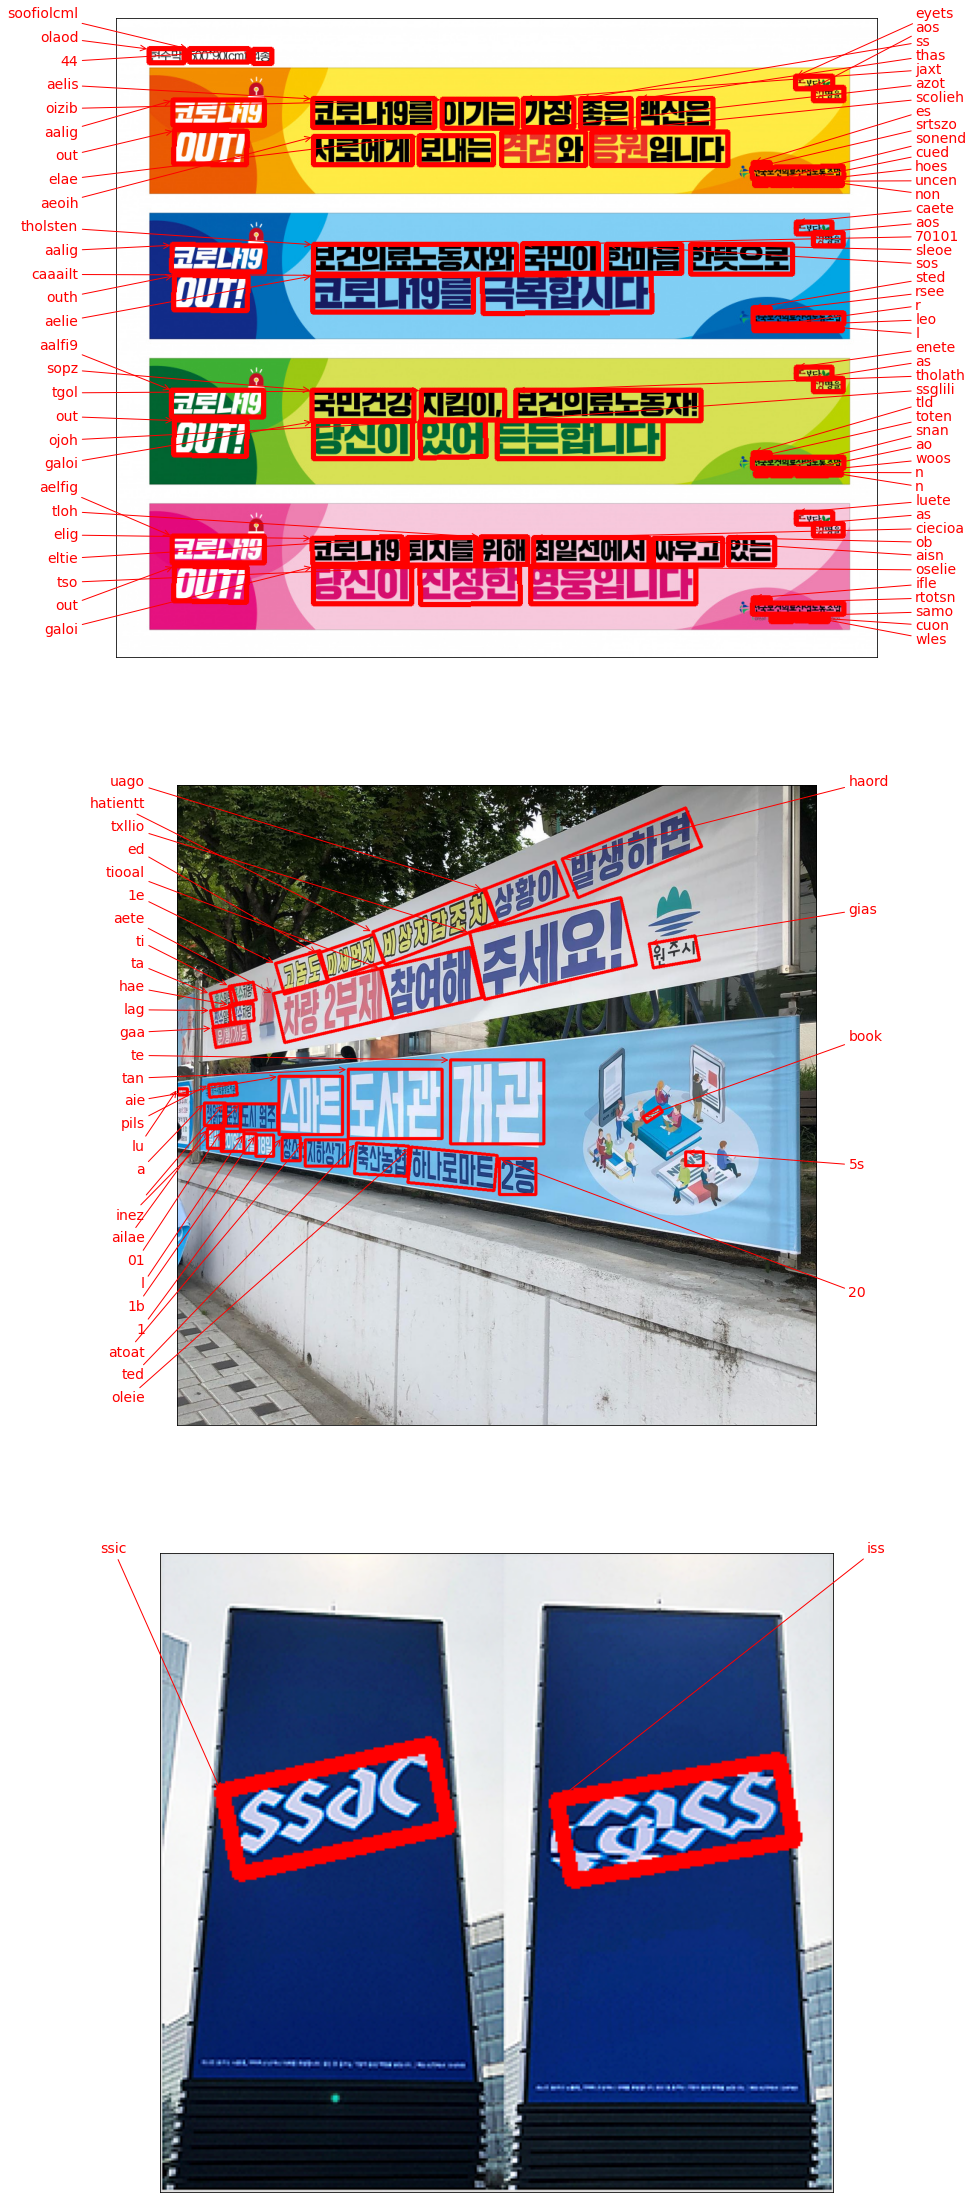

In [9]:
# Plot the predictions
f, ax = plt.subplots(nrows=3, figsize=(20, 40))
keras_ocr.tools.drawAnnotations(image=images_one, 
                                predictions=prediction_groups_one[0], ax=ax[0])
keras_ocr.tools.drawAnnotations(image=images_two,
                                predictions=prediction_groups_two[0], ax=ax[1])
keras_ocr.tools.drawAnnotations(image=images_three,
                                predictions=prediction_groups_three[0], ax=ax[2])
plt.show()

## Tesseract

In [10]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions_eng(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


def crop_word_regions_kor(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [11]:
work_dir1 = os.getenv('HOME')+'/aiffel/ocr_python/corona'
work_dir2 = os.getenv('HOME')+'/aiffel/ocr_python/Library'
work_dir3 = os.getenv('HOME')+'/aiffel/ocr_python/cass'

work_dir4 = os.getenv('HOME')+'/aiffel/ocr_python/cox'

img_file_path1 = work_dir1 + '/corona-Copy1.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
img_file_path2 = work_dir2 + '/Library-Copy1.png'
img_file_path3 = work_dir3 + '/cass-Copy1.png'

img_file_path4 = work_dir4 + '/cox.png'

In [12]:
cropped_image_path_list1 = crop_word_regions_kor(img_file_path1, work_dir1)

/aiffel/aiffel/ocr_python/corona/0000.png
/aiffel/aiffel/ocr_python/corona/0001.png
/aiffel/aiffel/ocr_python/corona/0002.png
/aiffel/aiffel/ocr_python/corona/0003.png
/aiffel/aiffel/ocr_python/corona/0004.png
/aiffel/aiffel/ocr_python/corona/0005.png
/aiffel/aiffel/ocr_python/corona/0006.png
/aiffel/aiffel/ocr_python/corona/0007.png
/aiffel/aiffel/ocr_python/corona/0008.png
/aiffel/aiffel/ocr_python/corona/0009.png
/aiffel/aiffel/ocr_python/corona/0010.png
/aiffel/aiffel/ocr_python/corona/0011.png
/aiffel/aiffel/ocr_python/corona/0012.png
/aiffel/aiffel/ocr_python/corona/0013.png
/aiffel/aiffel/ocr_python/corona/0014.png
/aiffel/aiffel/ocr_python/corona/0015.png
/aiffel/aiffel/ocr_python/corona/0016.png
/aiffel/aiffel/ocr_python/corona/0017.png
/aiffel/aiffel/ocr_python/corona/0018.png
/aiffel/aiffel/ocr_python/corona/0019.png
/aiffel/aiffel/ocr_python/corona/0020.png
/aiffel/aiffel/ocr_python/corona/0021.png
/aiffel/aiffel/ocr_python/corona/0022.png
/aiffel/aiffel/ocr_python/corona/0

In [13]:
cropped_image_path_list2 = crop_word_regions_kor(img_file_path2, work_dir2)

/aiffel/aiffel/ocr_python/Library/0000.png


In [14]:
# cropped_image_path_list3 = crop_word_regions_eng(img_file_path3, work_dir3)
'''
SystemError: tile cannot extend outside image
'''
cropped_image_path_list4 = crop_word_regions_eng(img_file_path4, work_dir4)

/aiffel/aiffel/ocr_python/cox/0000.png


In [15]:
def recognize_images_eng(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [16]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [17]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images_kor(cropped_image_path_list1)

면수미

000"90(0070)

아

송

고

ㅋㅋ

[

때

들

0|기른

가상

수

=

20

설

=

/너

=

베계

터는

걱

맨

마

글

2:

2"

1 1다

 가

00 으려퍼9529


떤2겨

  17701   ㆍ

턴

그

의|

=

로

은,

"|!

와

구몬

미

1]


인

[뜨

로

새고음

개

21

>

고

더!

건강

시킴0|,

=

재

이


노종재!

블{

내

(0)

| 있애

쁘

크

압니다

~

고

=

ㆍ

19

로


들

위0

1 조


릴선

001

| |

나우고


당신0

| 신성한


~

오가

Done


In [18]:
recognize_images_kor(cropped_image_path_list2)


Done


In [19]:
# recognize_images_eng(cropped_image_path_list3)
recognize_images_eng(cropped_image_path_list4)

he

Done


# 평가 기준
네이버 ocr 팀이 선정했던 기준을 차용하여 일부 선정하였다.
* 큰글자 인식
* 작은글자 인식
* 회전된 글자 인식
* 글씨체 인식


총 3개의 이미지를 사용하였으며 각 이미지 OCR 인식 차이를 위한 다른 형식의 이미지를 준비 하였다.
* 그래픽 작업만 하고 프린팅 하지 않은 깔끔한 이미지(corona.png)
* 실제 도서관 옥외 현수막(Library.png)
* 대형 전광판 글자(cass)
 * 추가 : 대형 전광판 글자(cox)
 * 글자 크기 차이

# 테스트 결과 분석
모듈별 출력 형태가 다르므로 분석을 위한 정리 필요(시각화)

# 모델 선정

|Index|평가기준|Google OCR API|Keras OCR|Google Tesseract OCR(1)|Google Tesseract OCR(2)|
|---|---|---|---|---|---|
|1|큰글자 인식 여부|O|O|X||
|2|작은글자 인식 여부|O|O||X|
|3|기울어진 글자 인식 여부|△|O||X|
|4|글씨체 인식|O|O|X|X|
|5|한글인식|O|X|||
|6|영어인식|O|O||X|
|7|종합 Detection 인식|O|O|X|X|
|8|종합 Recognition 인식|O|X|X|X|
|9|숫자 인식|O|X|X|X|

총 4장의 사진을 사용하였음.
* Google OCR API는 전반적으로 모든 평가기준에 만족했지만 100%의 완벽한 인식은 하지 못했다.
 * 회전 및 기울어진 영어 글자 인식이 잘되었다.
   * 많이 기울어진 이미지에 있는 글자는 제대로 인식되지 못했고 한자로 인식되었다.
 * 한글 뿐만 아니라 영어 또한 인식이 잘되었다.
 * 모든 평가 기준에서 준수한 성능을 거두었다.
 
 
* Keras는 한글이 제대로 인식되지 못했다.
 * 영어는 4개의 out 중에서 1개는 outh로 인식하였으며 완벽하지는 못했다.
 * 부분적인 숫자를 제대로 인식하지 못했다.
 * 이미지 내의 그림과 글자 Detection은 잘되었다.
   * 추가적으로 한글이 잘 학습된 OCR은 추후 확인해보면 좋을 듯하다.


* Google Tesseract는 거의 모든 평가기준에 맞지않았다.
 * Tesseract는 Detection 부터 제대로 되지 않았다.
 * 이미지의 사이즈 문제로 error가 발생하였고 이유는 잘 모르겠다. crop할 때 이미지의 범위를 벗어나서 생기는 오류로 확인했었지만 확인할 수 없었다.
   * 그래서 다른 사진을 사용하였지만 제대로 인식되지 않았다.
 * 2장의 이미지를 확인해본 결과 성능이 좋지 못했다.